In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
#  style.use('dark_background') check this style later
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd

In [58]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [60]:
engine = create_engine("sqlite:///surfs_up\hawaii.sqlite")

In [61]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [62]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [63]:
# Save references to each table
Measurment = Base.classes.measurement
Station = Base.classes.station

In [64]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [81]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurment.date, Measurment.prcp).filter(Measurment.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [97]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','percipiation'])
print(df)
df.set_index(df['date'], inplace = True)
print(df.to_string(index=False))

            date  percipiation
0     2016-08-23          0.00
1     2016-08-24          0.08
2     2016-08-25          0.08
3     2016-08-26          0.00
4     2016-08-27          0.00
...          ...           ...
2225  2017-08-19          0.09
2226  2017-08-20           NaN
2227  2017-08-21          0.56
2228  2017-08-22          0.50
2229  2017-08-23          0.45

[2230 rows x 2 columns]
       date  percipiation
 2016-08-23          0.00
 2016-08-24          0.08
 2016-08-25          0.08
 2016-08-26          0.00
 2016-08-27          0.00
 2016-08-28          0.01
 2016-08-29          0.00
 2016-08-30          0.00
 2016-08-31          0.13
 2016-09-01          0.00
 2016-09-02          0.00
 2016-09-03          0.00
 2016-09-04          0.03
 2016-09-05           NaN
 2016-09-06           NaN
 2016-09-07          0.05
 2016-09-08          0.00
 2016-09-09          0.03
 2016-09-10          0.00
 2016-09-11          0.05
 2016-09-12          0.00
 2016-09-13          0.02
 2016

In [98]:
# Sort the dataframe by date
df.sort_index()

,date,percipiation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [99]:
print(df.to_string(index=False))

       date  percipiation
 2016-08-23          0.00
 2016-08-24          0.08
 2016-08-25          0.08
 2016-08-26          0.00
 2016-08-27          0.00
 2016-08-28          0.01
 2016-08-29          0.00
 2016-08-30          0.00
 2016-08-31          0.13
 2016-09-01          0.00
 2016-09-02          0.00
 2016-09-03          0.00
 2016-09-04          0.03
 2016-09-05           NaN
 2016-09-06           NaN
 2016-09-07          0.05
 2016-09-08          0.00
 2016-09-09          0.03
 2016-09-10          0.00
 2016-09-11          0.05
 2016-09-12          0.00
 2016-09-13          0.02
 2016-09-14          1.32
 2016-09-15          0.42
 2016-09-16          0.06
 2016-09-17          0.05
 2016-09-18          0.00
 2016-09-19          0.00
 2016-09-20          0.00
 2016-09-21          0.00
 2016-09-22          0.02
 2016-09-23          0.00
 2016-09-24          0.00
 2016-09-25          0.00
 2016-09-26          0.06
 2016-09-27          0.02
 2016-09-28          0.00
 2016-09-29 

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-03-12'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2017-01-09'),
  Text(1000.0, 0, '2017-08-14'),
  Text(1500.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2016-12-24'),
  Text(2500.0, 0, '')])

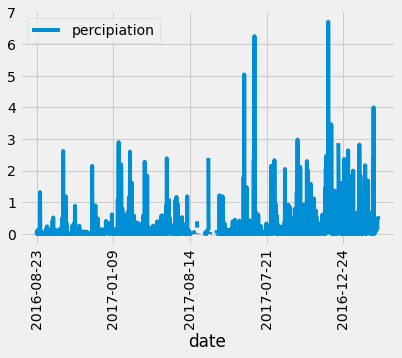

In [104]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation =90)

In [109]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,percipiation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [110]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [121]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurment.station, func.count(Measurment.station)).\
    group_by(Measurment.station).order_by(func.count(Measurment.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [122]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurment.tobs), func.max(Measurment.tobs), func.avg(Measurment.tobs)).\
filter(Measurment.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

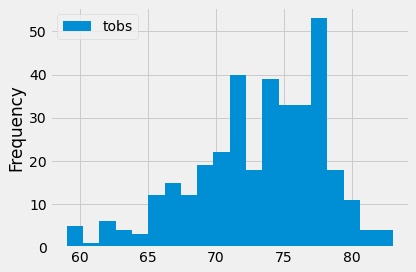

In [152]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurment.tobs).\
filter(Measurment.station == "USC00519281").\
filter(Measurment.date >= prev_year).all()
df = pd.DataFrame(results,columns=["tobs"])
#print(df)
#print(df.to_string(index=False))
df.plot.hist(bins=20)
plt.tight_layout()
# By changing the bin to 5 still we can see the area with the most data and it is almost balance.
# By changing the bin to 20 so the graph is not balance properlly and we cannot make any conclusion based on it.

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge